# Exercice 1

In [2]:
import pandas as pd
from io import StringIO

# Les données de logs
log_data = """
192.168.0.1 - - [12/Mar/2023:15:30:45] "GET / page1 HTTP/1.1" 200
192.168.0.2 - - [12/Mar/2023:15:31:15] "GET /page2 HTTP/1.1" 404
192.168.0.3 - - [12/Mar/2023:15:32:30] "POST /submit_data HTTP/1.1" 200"""

# Lecture des données dans un DataFrame Pandas
col_names = ['IP', 'User', 'Date', 'Request','status']
df = pd.read_csv(StringIO(log_data), sep=' ', names=col_names, parse_dates=['Date'] ,dayfirst=True)

# Affichage du DataFrame
print(df)

            IP User                    Date                     Request  \
192.168.0.1  -    -  [12/Mar/2023:15:30:45]        GET / page1 HTTP/1.1   
192.168.0.2  -    -  [12/Mar/2023:15:31:15]         GET /page2 HTTP/1.1   
192.168.0.3  -    -  [12/Mar/2023:15:32:30]  POST /submit_data HTTP/1.1   

             status  
192.168.0.1     200  
192.168.0.2     404  
192.168.0.3     200  


C:\Users\amira\AppData\Local\Temp\ipykernel_14540\912778796.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(StringIO(log_data), sep=' ', names=col_names, parse_dates=['Date'] ,dayfirst=True)


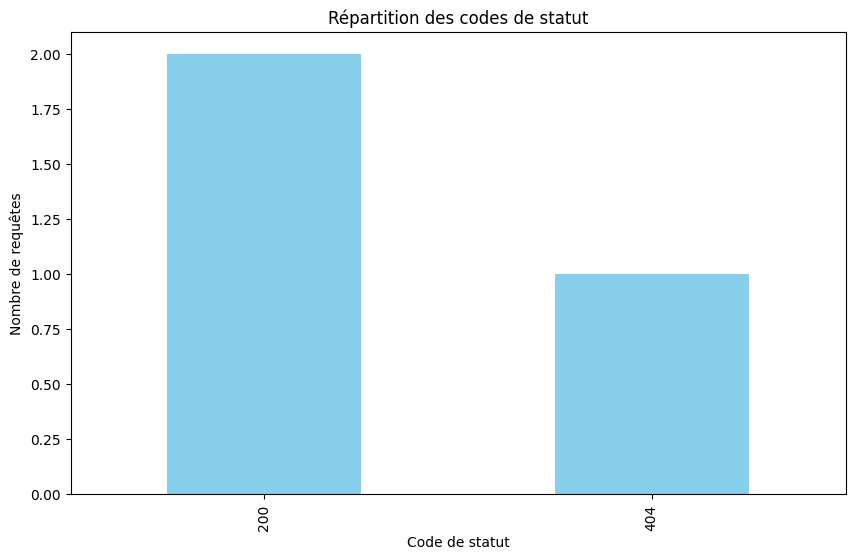

In [3]:
total_requests = df.shape [0]
unique_ips = df[ 'IP'].nunique ()
status_counts = df ['status'].value_counts()
# Visualisation
plt.figure(figsize=(10, 6))
# Diagramme à barres pour les codes de statut
status_counts.plot (kind='bar', color='skyblue')
plt.title( 'Répartition des codes de statut')
plt.xlabel('Code de statut')
plt.ylabel('Nombre de requêtes')
plt. show ()

# Exercice 2 

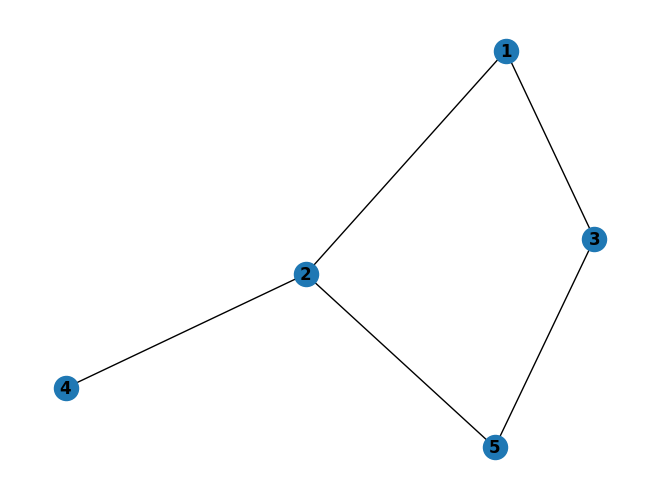

Nombre de neuds: 5
Nombre d'arêtes: 5
Degré des noeuds : {1: 2, 2: 3, 3: 2, 4: 1, 5: 2}
Centralité intermédiaire: {1: 0.16666666666666666, 2: 0.5833333333333333, 3: 0.08333333333333333, 4: 0.0, 5: 0.16666666666666666}


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# Création d'un graphe non orienté (vous pouvez utiliser nx.DiGraph() pour un graphe orienté)
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5])

G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5)])
# Visualisation du graphe
nx.draw(G, with_labels=True, font_weight= 'bold')
plt.show()
# Mesures de la topologie
print("Nombre de neuds:",G.number_of_nodes())
print("Nombre d'arêtes:",G.number_of_edges())

print("Degré des noeuds :",dict (G. degree()))
print("Centralité intermédiaire:", nx.betweenness_centrality(G))

# Exercice 3 

In [5]:
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Exemple de données d'engagement des utilisateurs (texte des commentaires)
user_data =[
"Commentaire de l'utilisateur 1: satisfait",
"Commentaire de l'utilisateur 3: Je ne recommanderais pas ce produit",
"Commentaire de l'utilisateur 4: Je recommande vraiment.", ]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(user_data)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit (X)
# Obtenez les étiquettes de cluster pour chaque utilisateur
user_labels = kmeans.labels_
# Affichez les utilisateurs dans chaque cluster
for cluster_num in range (num_clusters):
    cluster_members = [user_data[i] for i in range (len (user_data)) if user_labels[i] == cluster_num]
    print(f"Cluster {cluster_num + 1} : {cluster_members}")

c:\Users\amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1 : ["Commentaire de l'utilisateur 3: Je ne recommanderais pas ce produit"]
Cluster 2 : ["Commentaire de l'utilisateur 1: satisfait", "Commentaire de l'utilisateur 4: Je recommande vraiment."]
